
# What is attrition in business?
Attrition in business describes a gradual but deliberate reduction of staff numbers that occurs as employees retire or resign and are not replaced. The term is also sometimes used to describe the loss of customers or clients as they mature beyond a product or company's target market without being replaced by a younger generation

![](https://www.teamly.com/blog/wp-content/uploads/2022/06/Types-of-Employee-Attrition-768x354.png
)


# How attrition affect a company?
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers

# Positive attrition:
Positive attrition refers to staff turnover that actually benefits the organization. Think of an employee who is a poor performer, makes many errors, has difficulty working with others, delivers low quality customer service and/or uses sick leave and vacation time as the hours are earned. When the employee quits, the organization benefits because now the supervisor can replace the low performer employee with someone who is better for the organization.
# Negative attrition:
Negative attrition refers to the loss of an employee the organization would like to keep. Qualified and skilled employees leave for a variety of reasons, and it is often challenging to find an equally skilled replacement. Negative attrition, especially in industries with the highest turnover rates, is expensive. The organization must once again recruit, assess, hire and train a new employee, and until the position is filled, team productivity declines.

# Our Objectives:
* Study the HR employee attrition data to identify the patters and causes of attrition with respect to various parameters.
* Identify the important parameter and generate helpful insights from them.
* Build model to predict if the employee is unsatisfied and will resign or is satisfied and will stay.
* Compare the parameters of a satisfied and an unsatisfied employee to come up with idea of what can be improved.
* Identify future attrition early so that proper measures can be taken on time

Education
+ 1 'Below College'
+ 2 'College'
+ 3 'Bachelor'
+ 4 'Master'
+ 5 'Doctor'

EnvironmentSatisfaction
+ 1 'Low'
+ 2 'Medium'
+ 3 'High'
+ 4 'Very High'

JobInvolvement
+ 1 'Low'
+ 2 'Medium'
+ 3 'High'
+ 4 'Very High'

JobSatisfaction
+ 1 'Low'
+ 2 'Medium'
+ 3 'High'
+ 4 'Very High'

PerformanceRating
+ 1 'Low'
+ 2 'Good'
+ 3 'Excellent'
+ 4 'Outstanding'

RelationshipSatisfaction
+ 1 'Low'
+ 2 'Medium'
+ 3 'High'
+ 4 'Very High'

WorkLifeBalance
+ 1 'Bad'
+ 2 'Good'
+ 3 'Better'
+ 4 'Best'

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [48]:
file = r"C:\Users\CC-Student\Desktop\Data\HR-Employee-Attrition.csv"
df = pd.read_csv(file)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [49]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [50]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


# Exploratory Data Analysis (EDA)

In [51]:
#Print the number of unique for categorical columns 
for i in df.describe(include='object').columns:
    print(df[i].value_counts())
    print('\n')

Attrition
No     1233
Yes     237
Name: count, dtype: int64


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


Gender
Male      882
Female    588
Name: count, dtype: int64


JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


Over18
Y    147

In [52]:
#check for missing values
df.isnull().sum().sum()


0

In [53]:
#check for duplicates
df.duplicated().sum()

0

In [54]:
#Categorical Columns
num = df.select_dtypes(include='number')
#Numerical Columns
cat = df.select_dtypes(include='object')

Attrition
No     1233
Yes     237
Name: count, dtype: int64


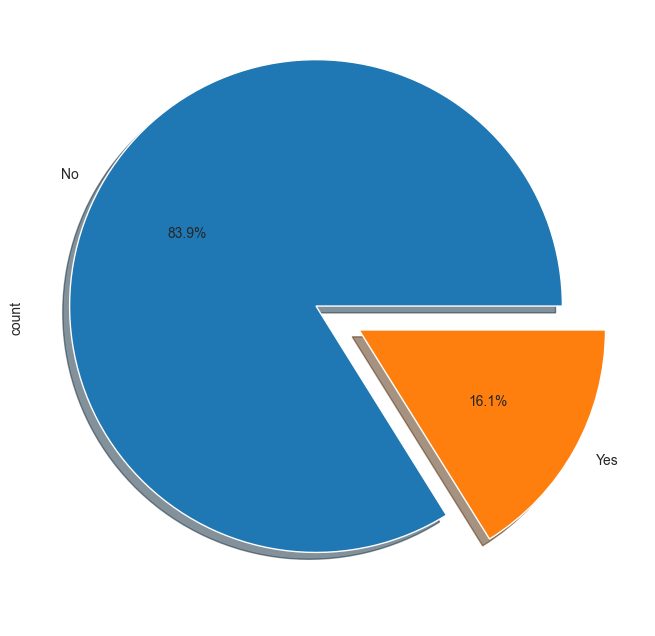

In [55]:
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
df['Attrition'].value_counts().plot(kind='pie', explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True)
print(df['Attrition'].value_counts())

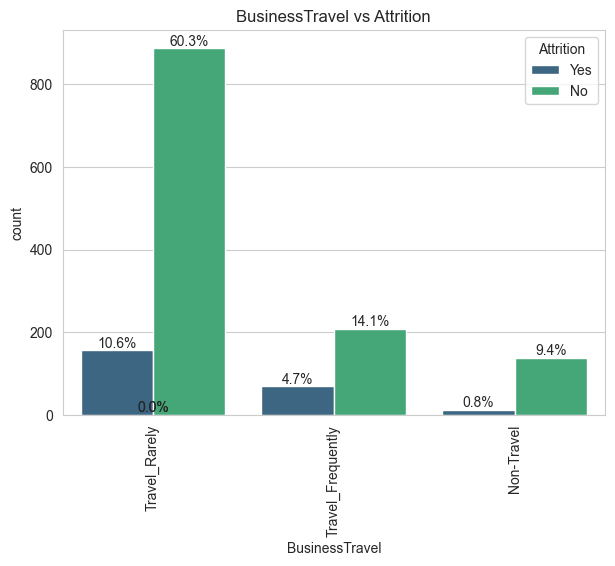

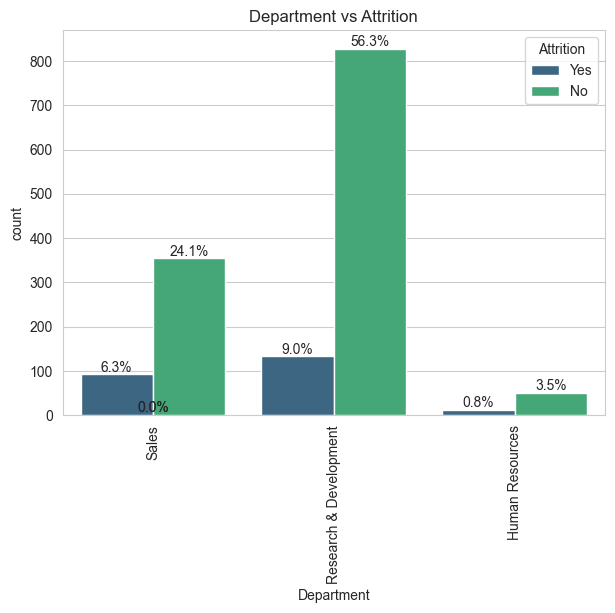

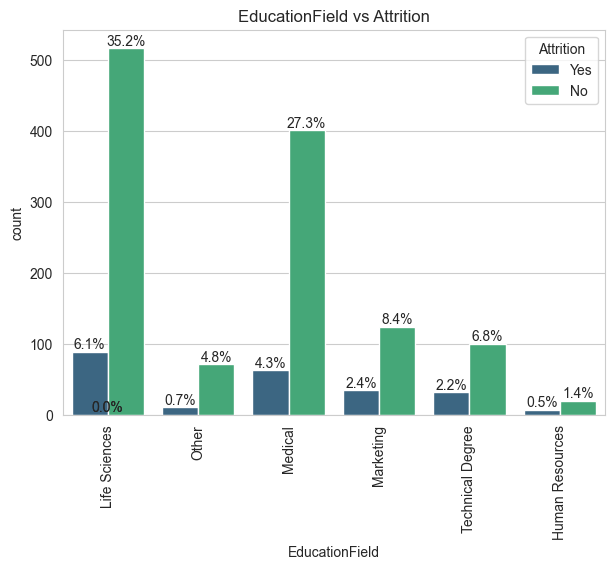

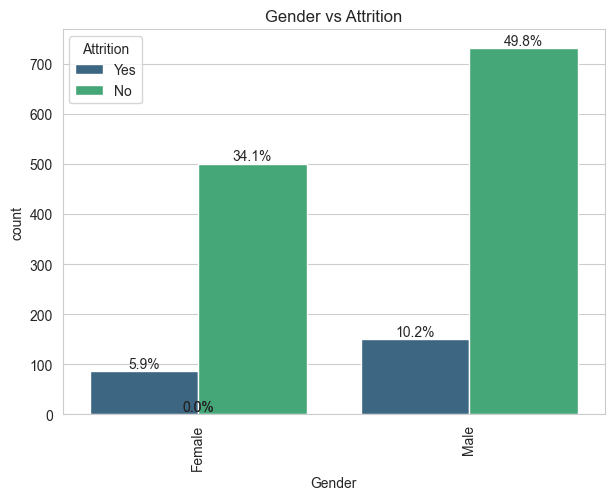

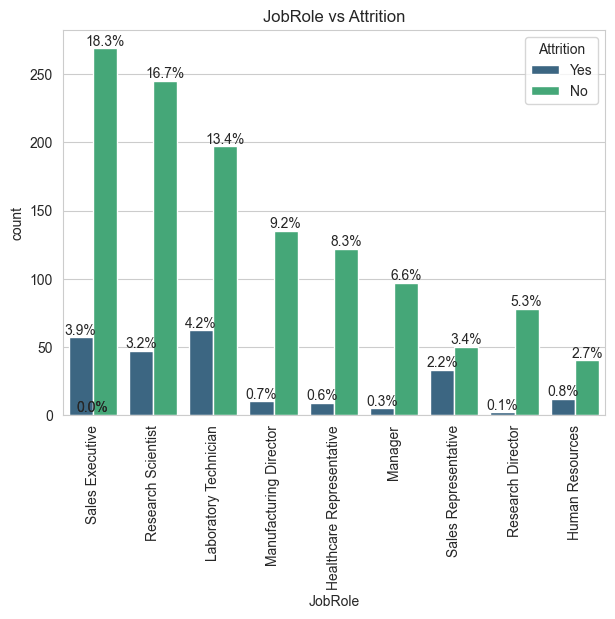

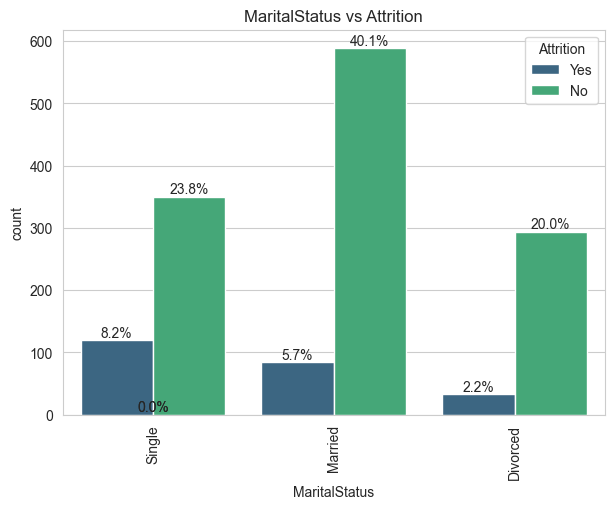

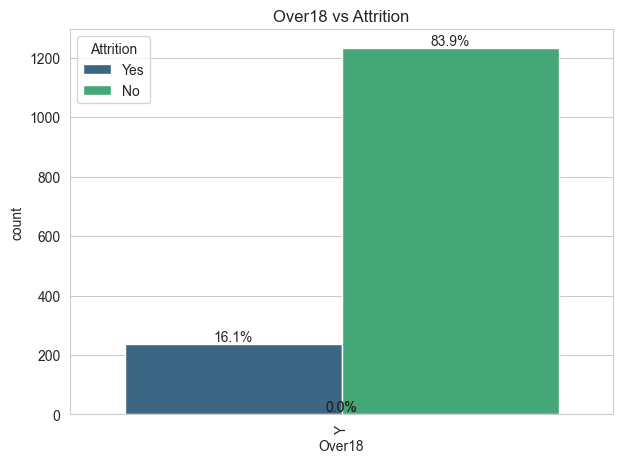

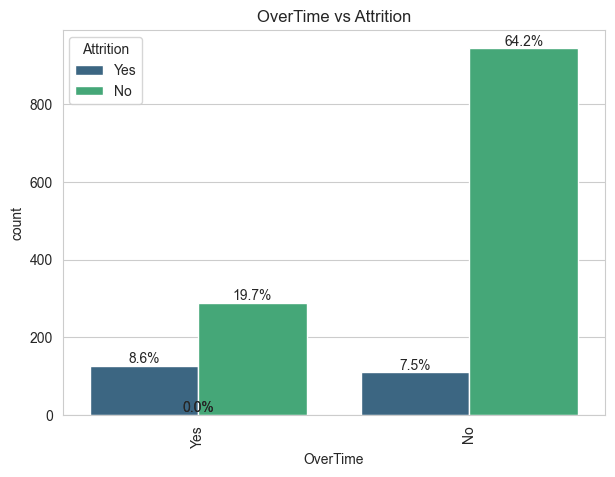

In [56]:
# select columns which are categorical except Attrition to graph VS Attrition

categorical_columns = [col for col in cat if col != 'Attrition']

for col in categorical_columns:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(x=col, hue='Attrition', data=cat, palette='viridis')
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=90)
    
    # Annotate each bar with percentages
    total = len(cat)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show()

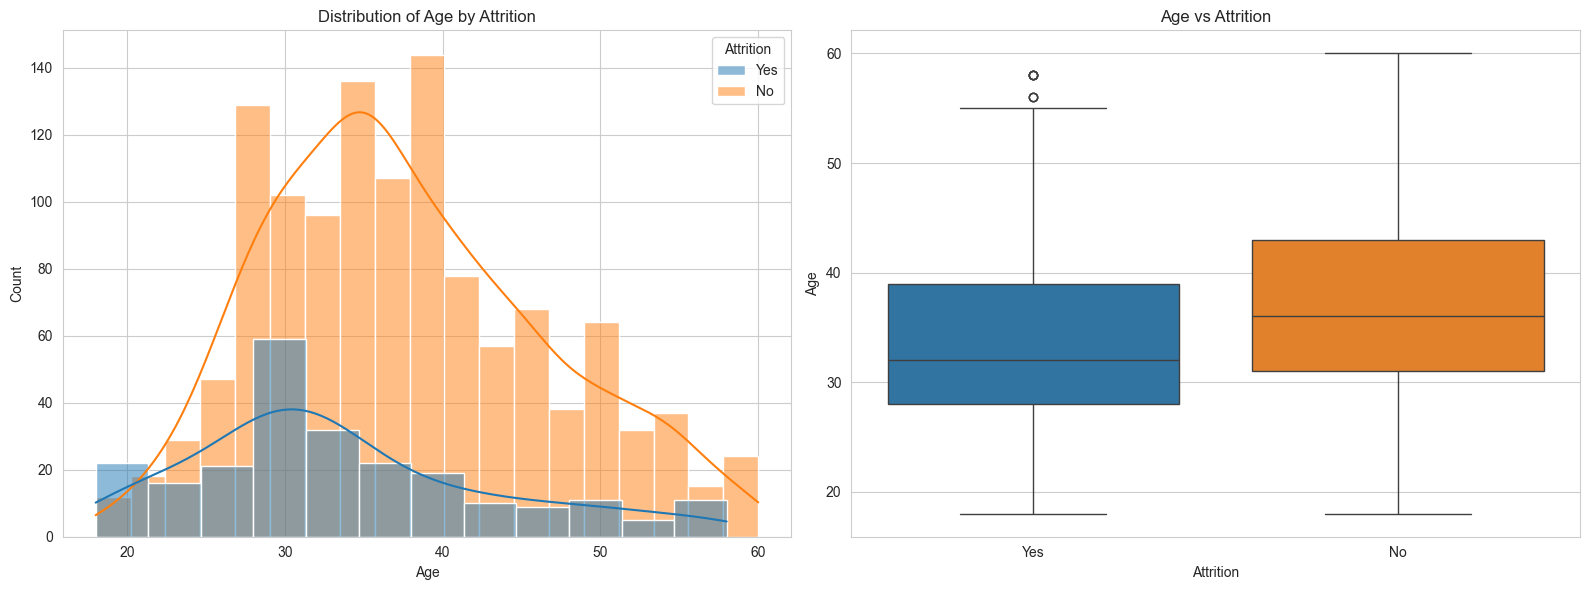

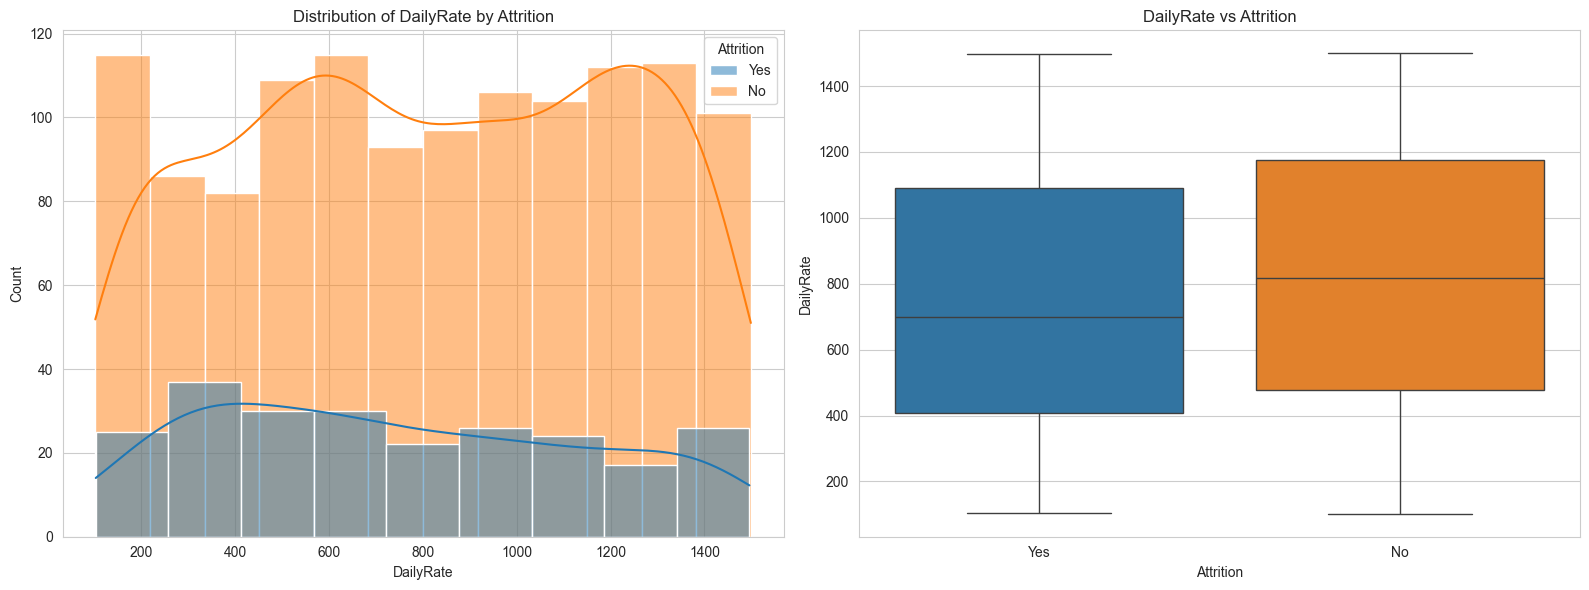

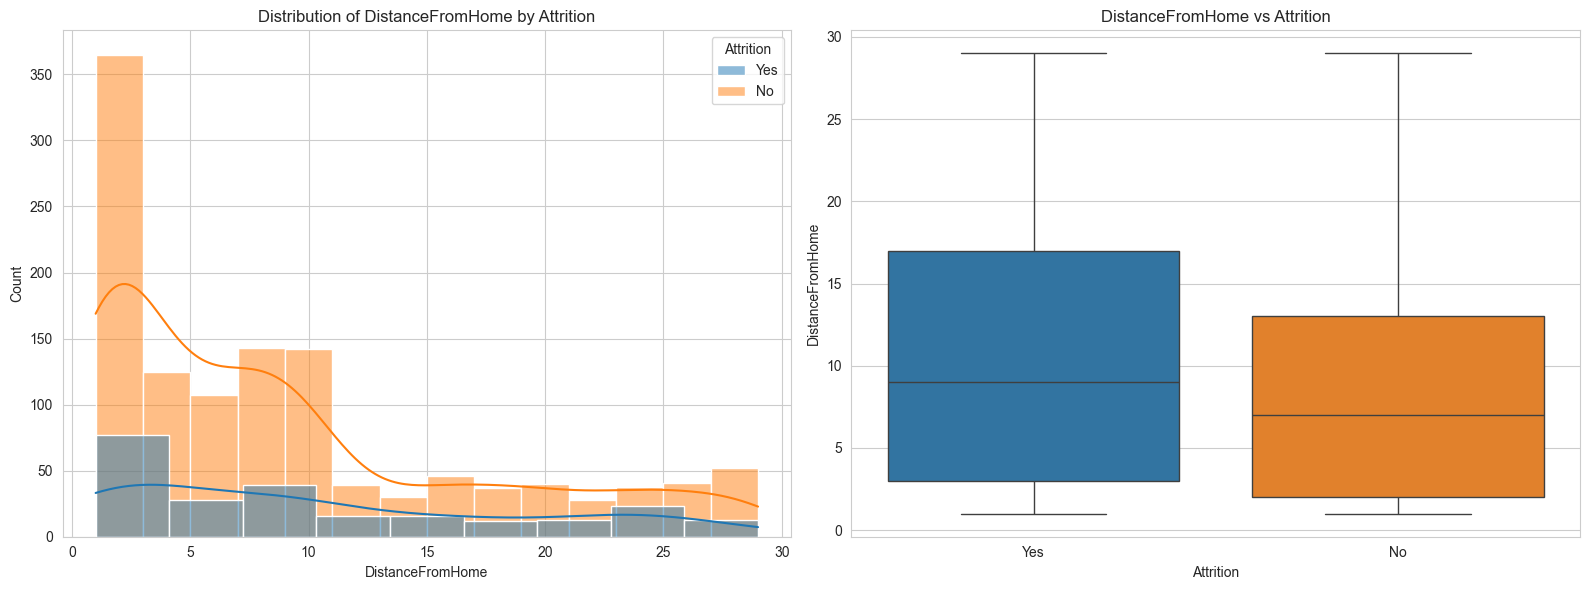

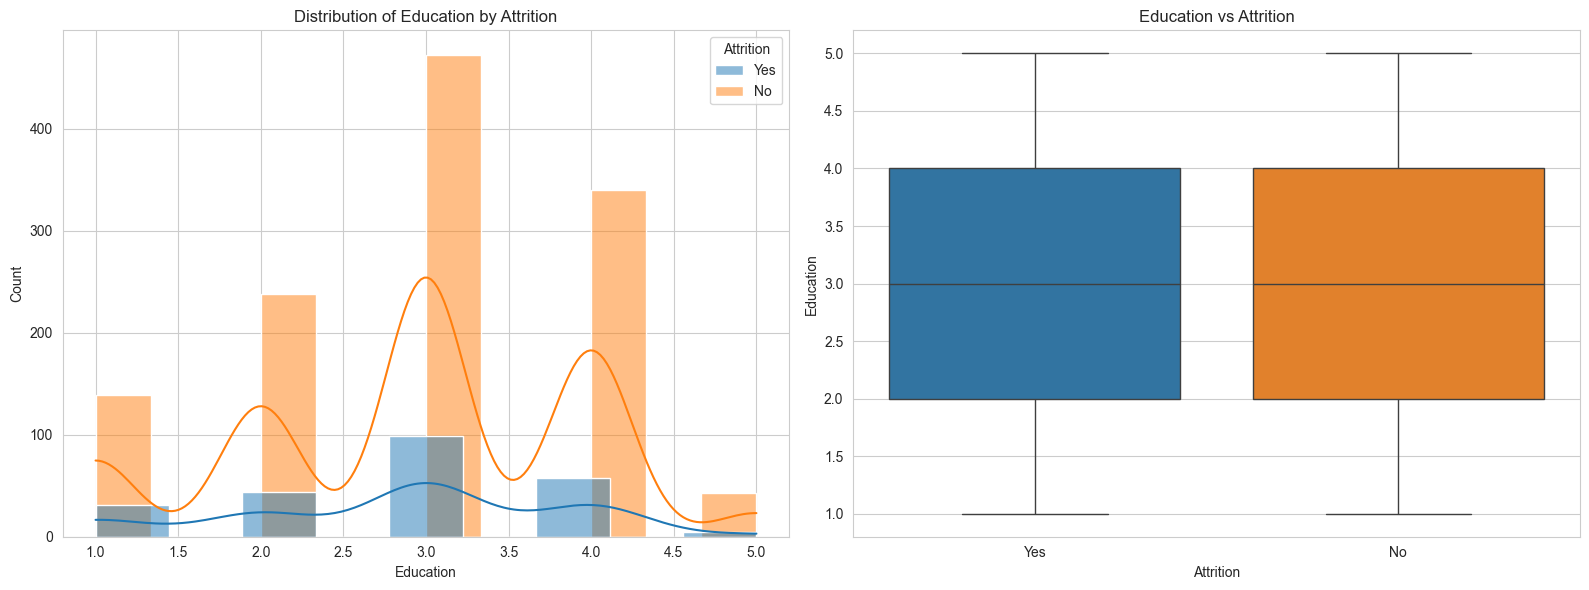

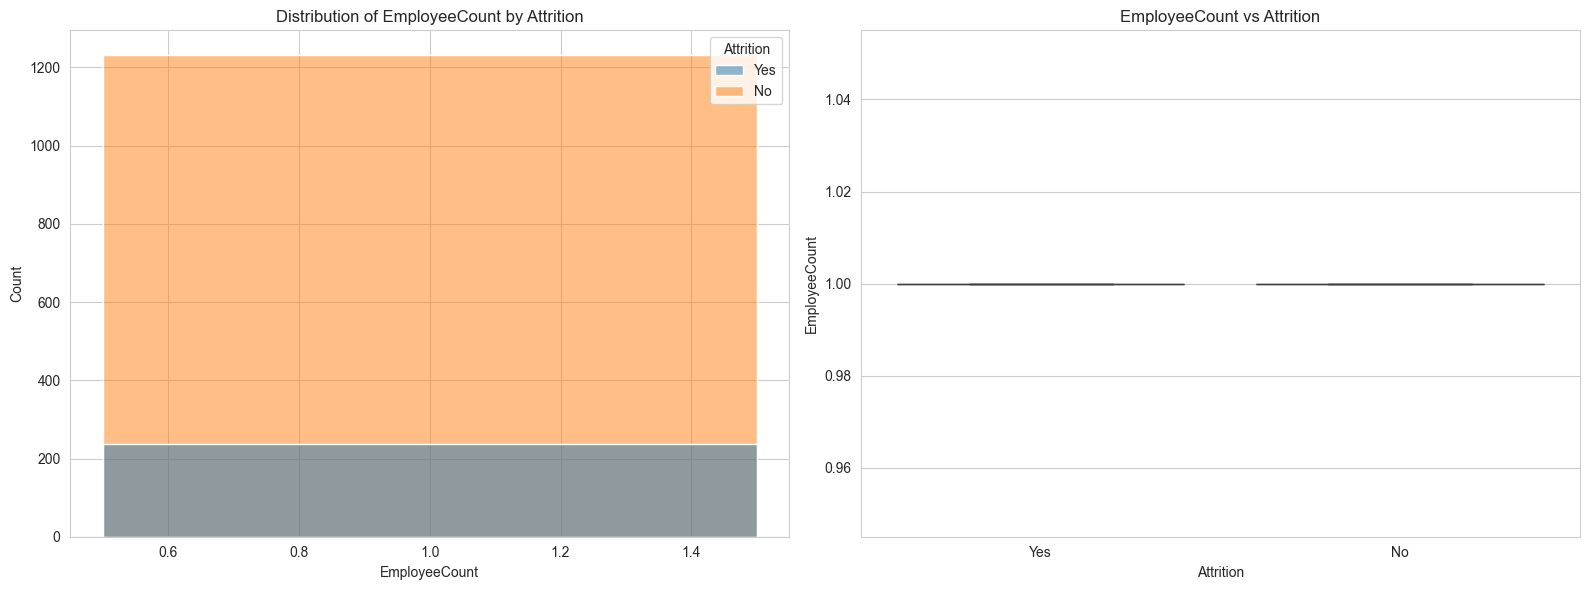

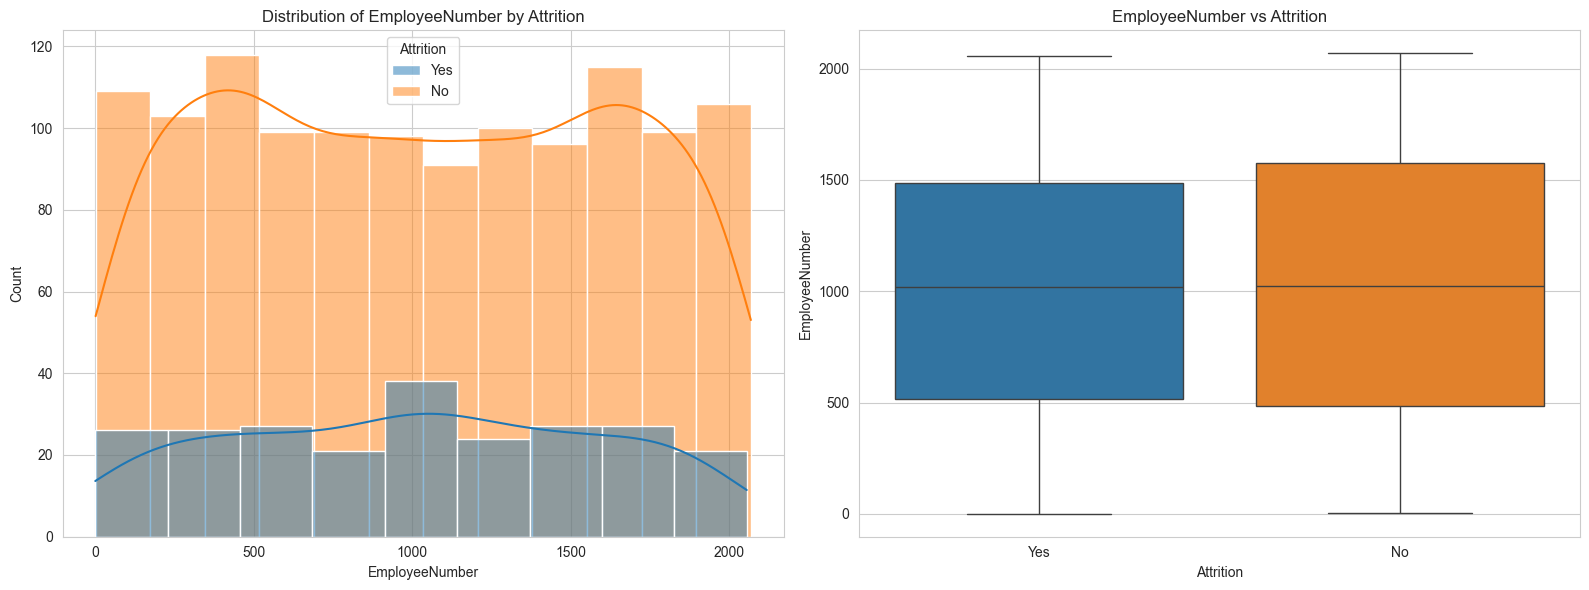

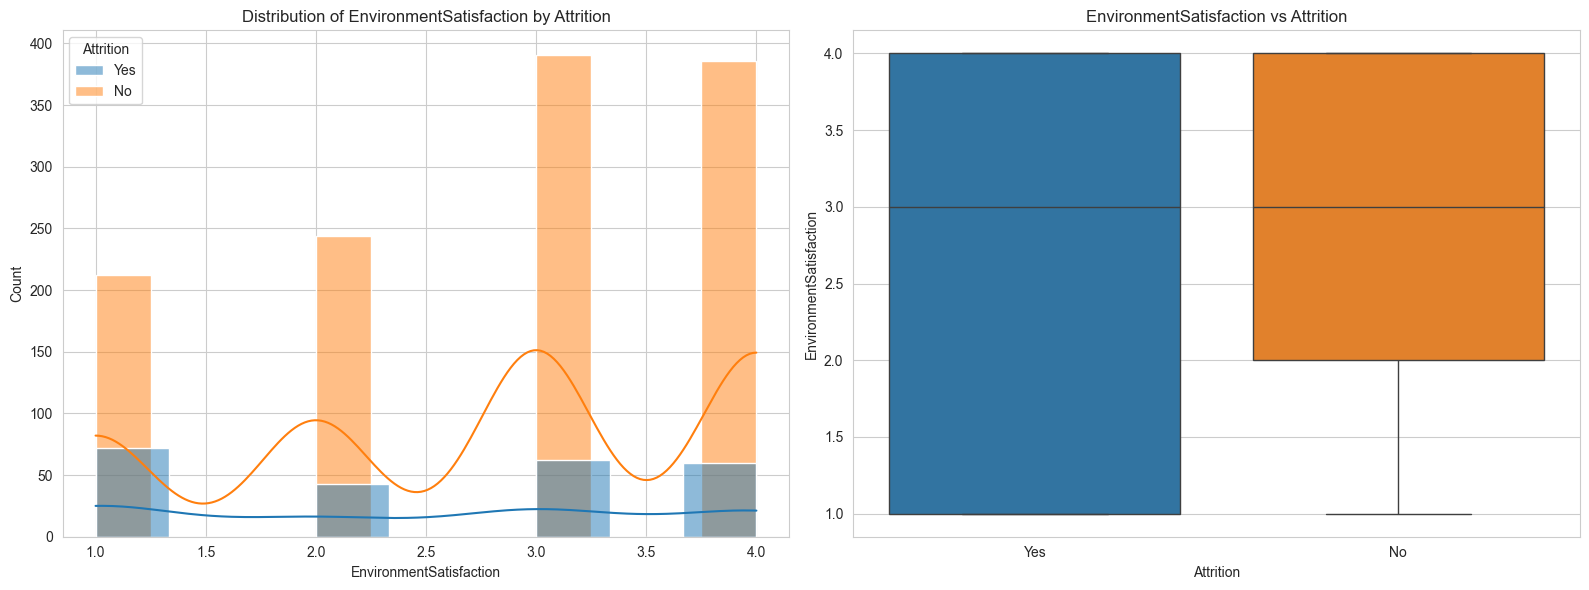

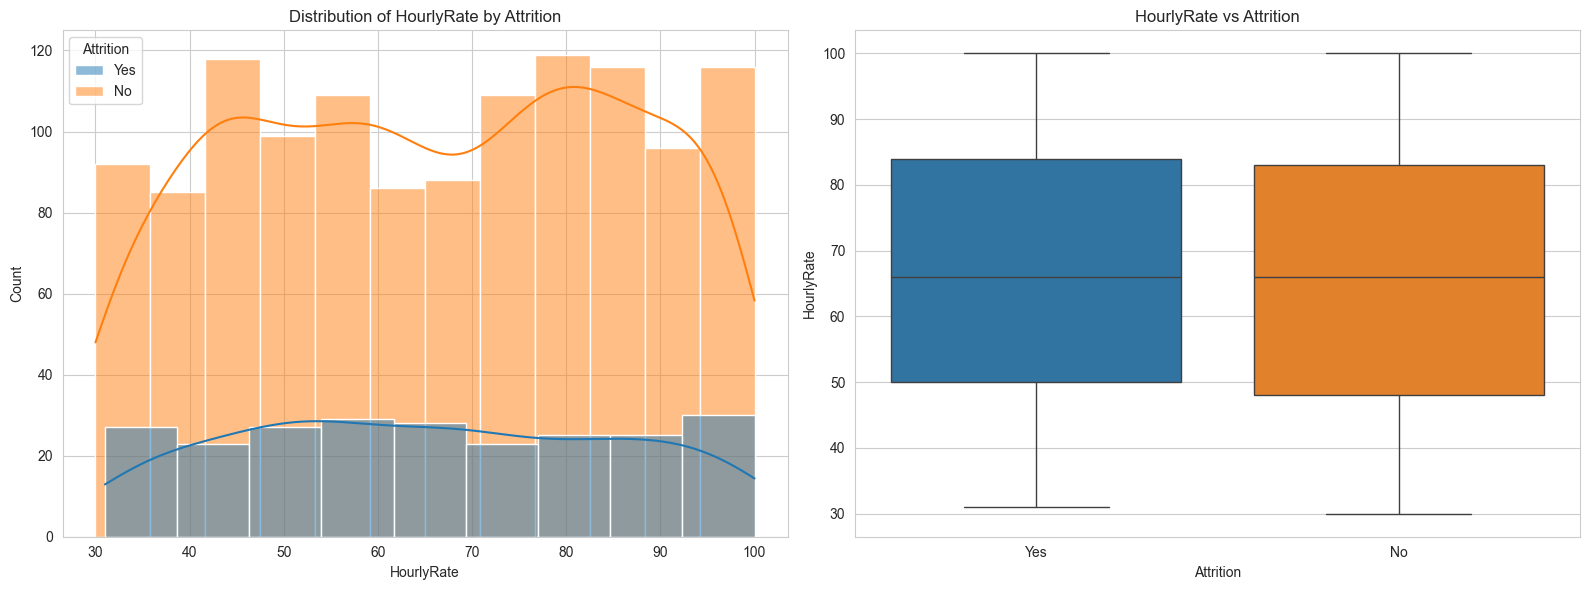

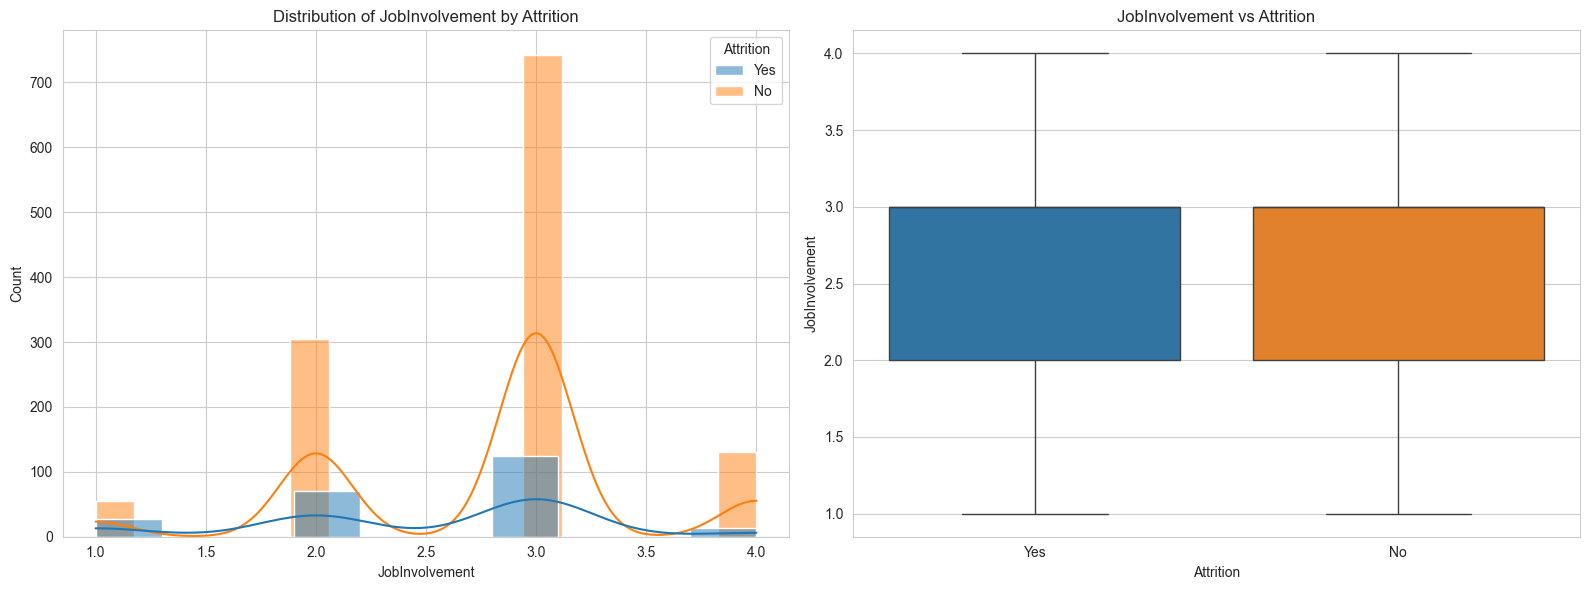

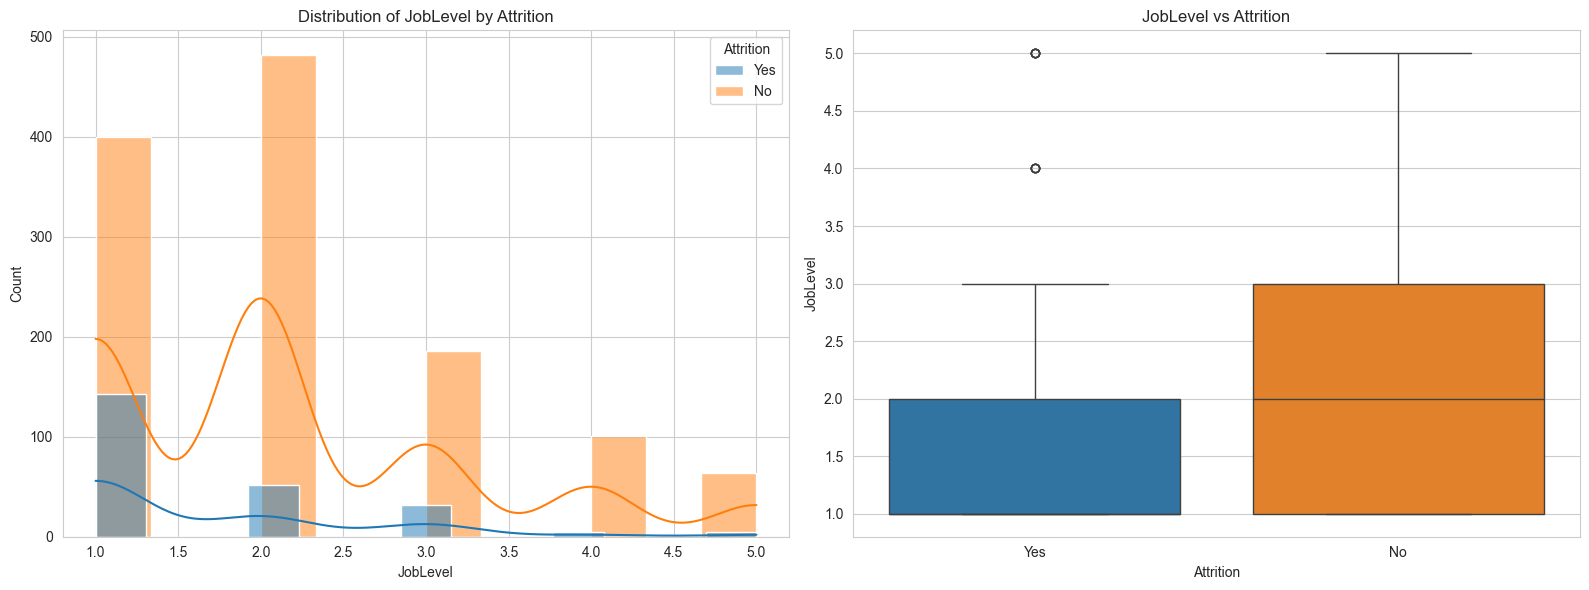

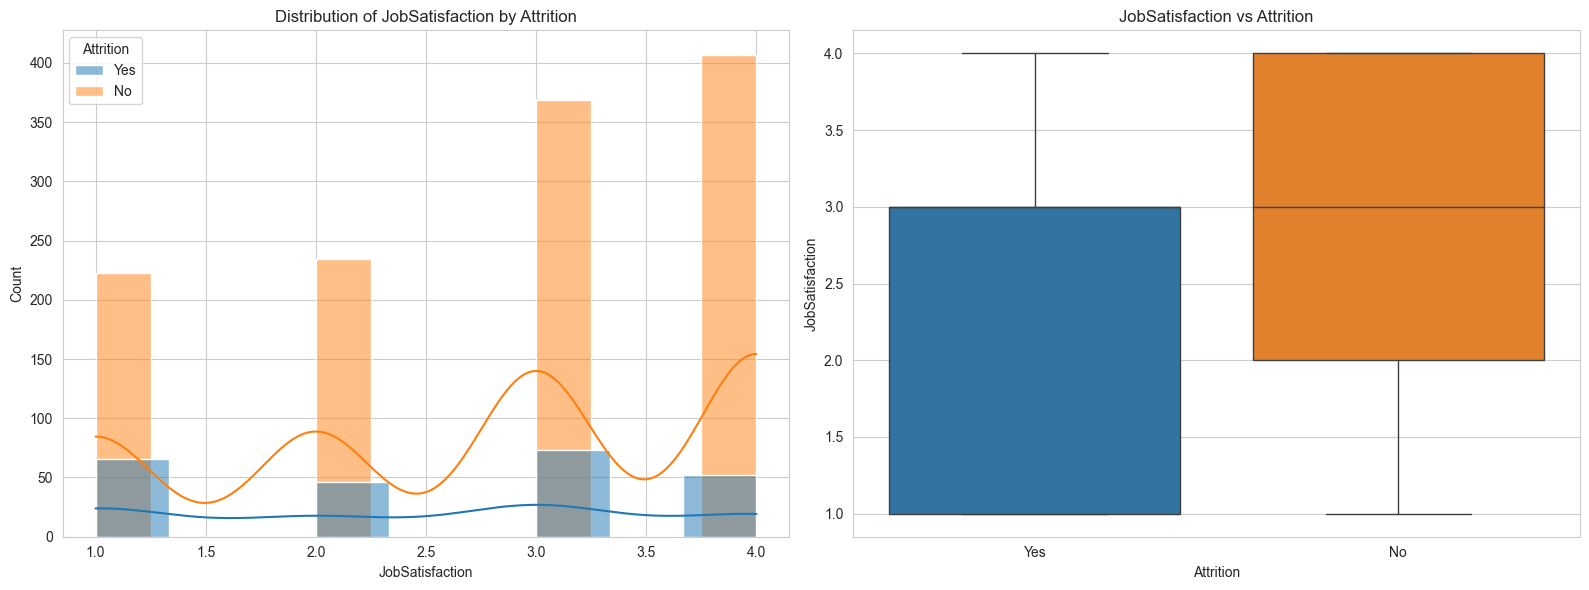

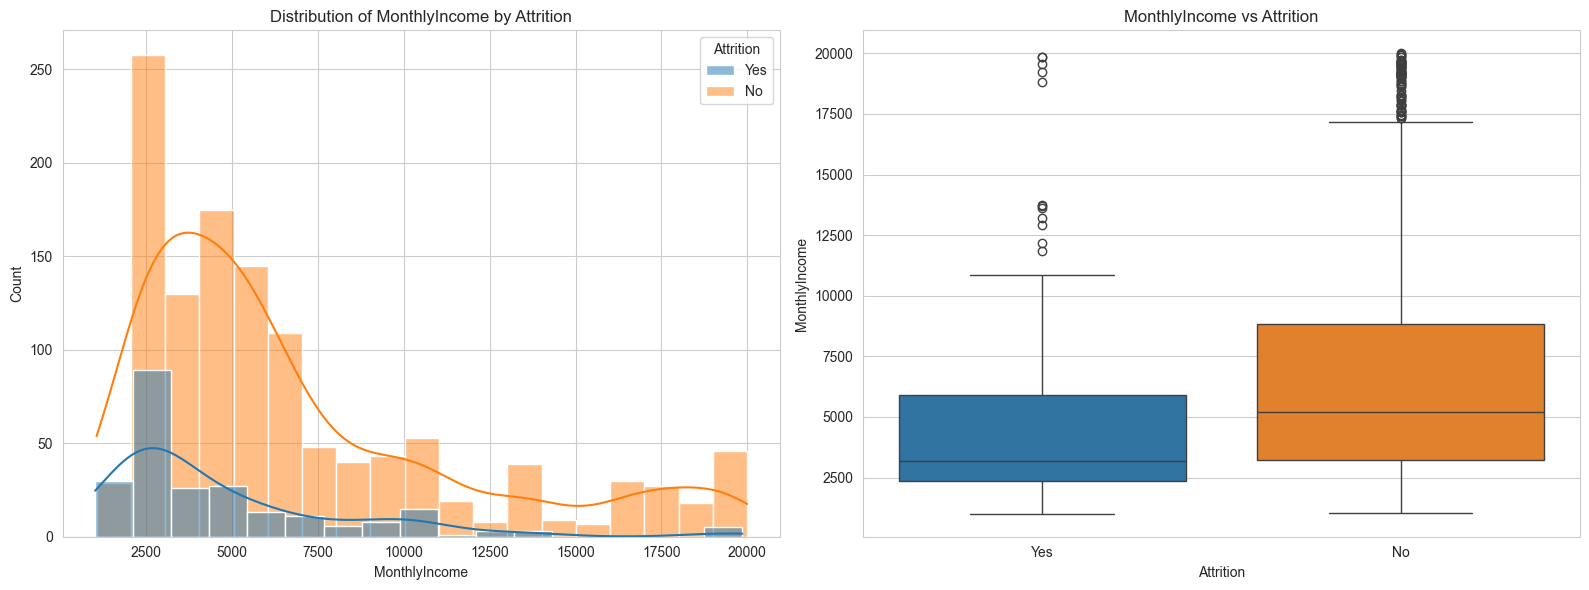

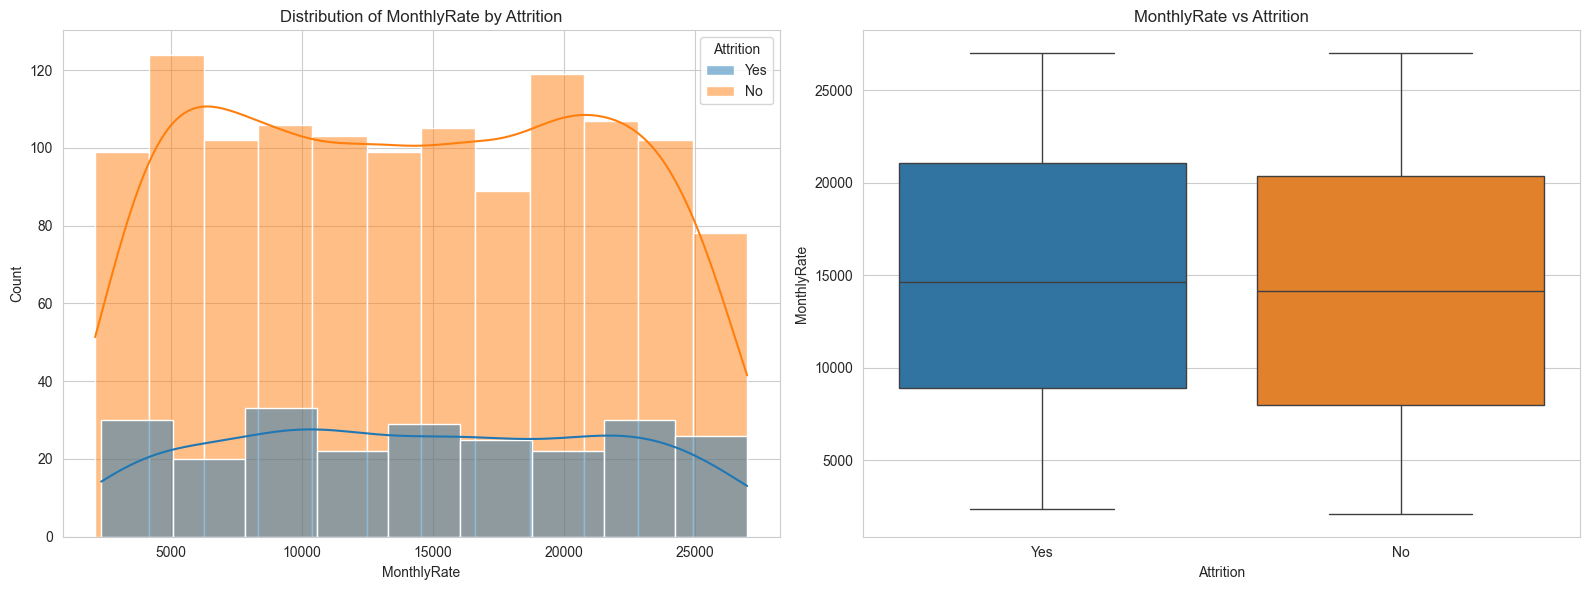

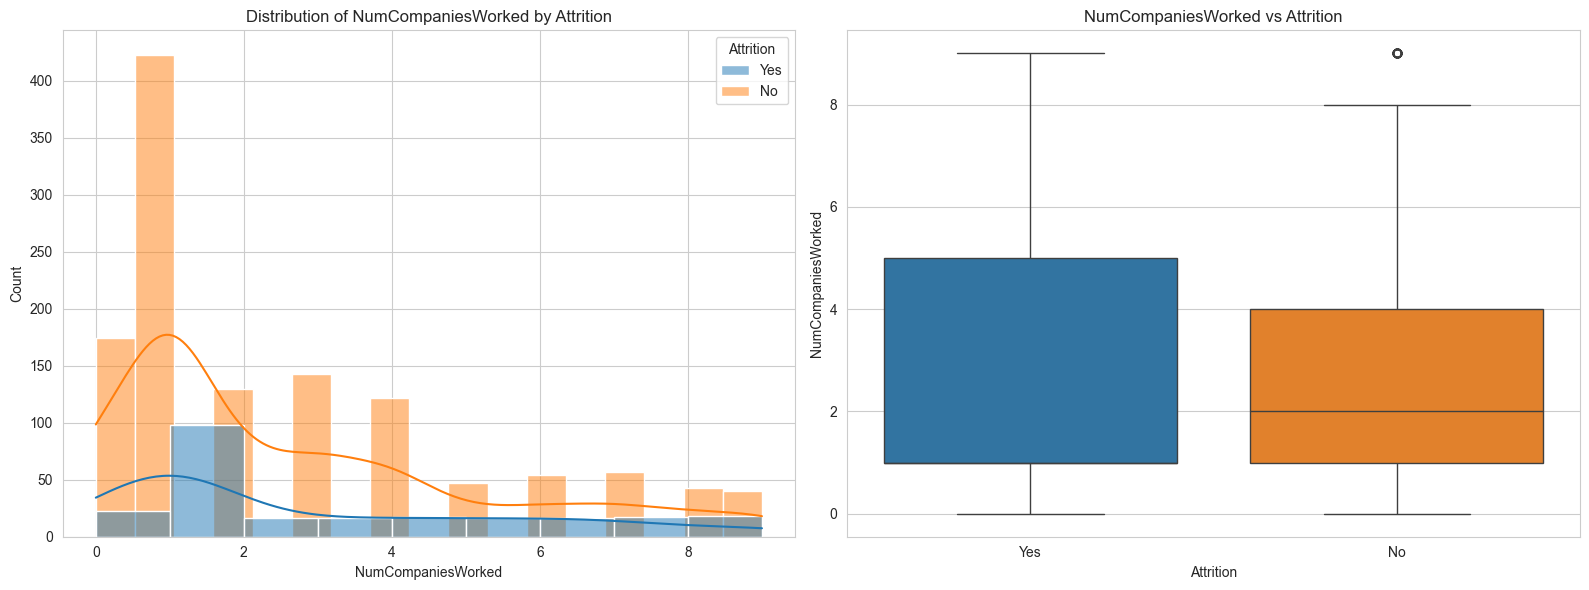

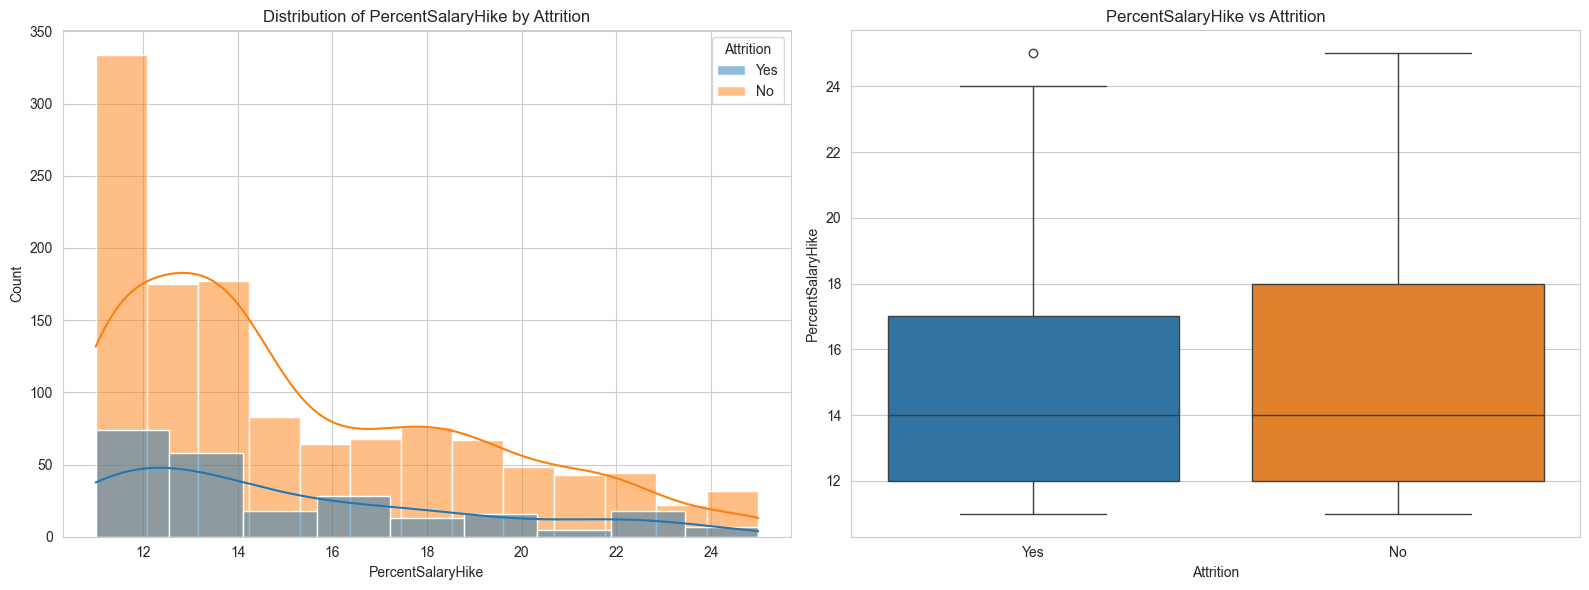

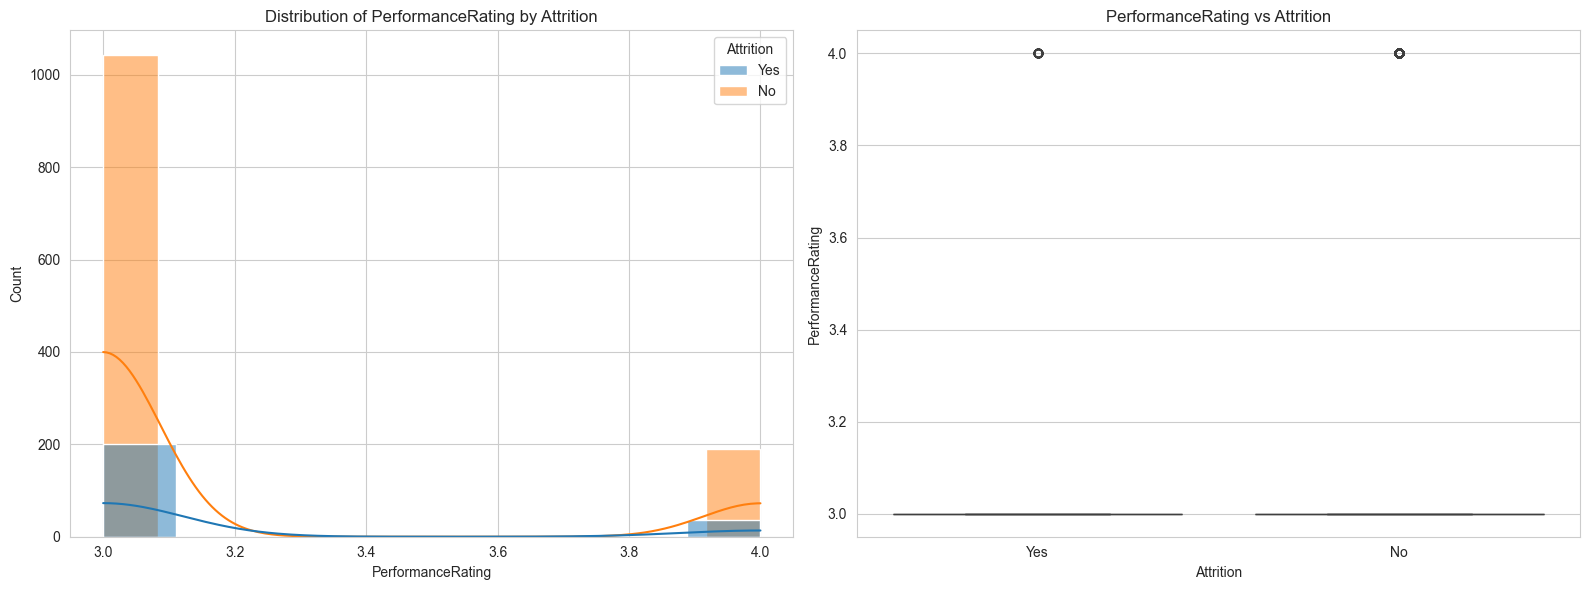

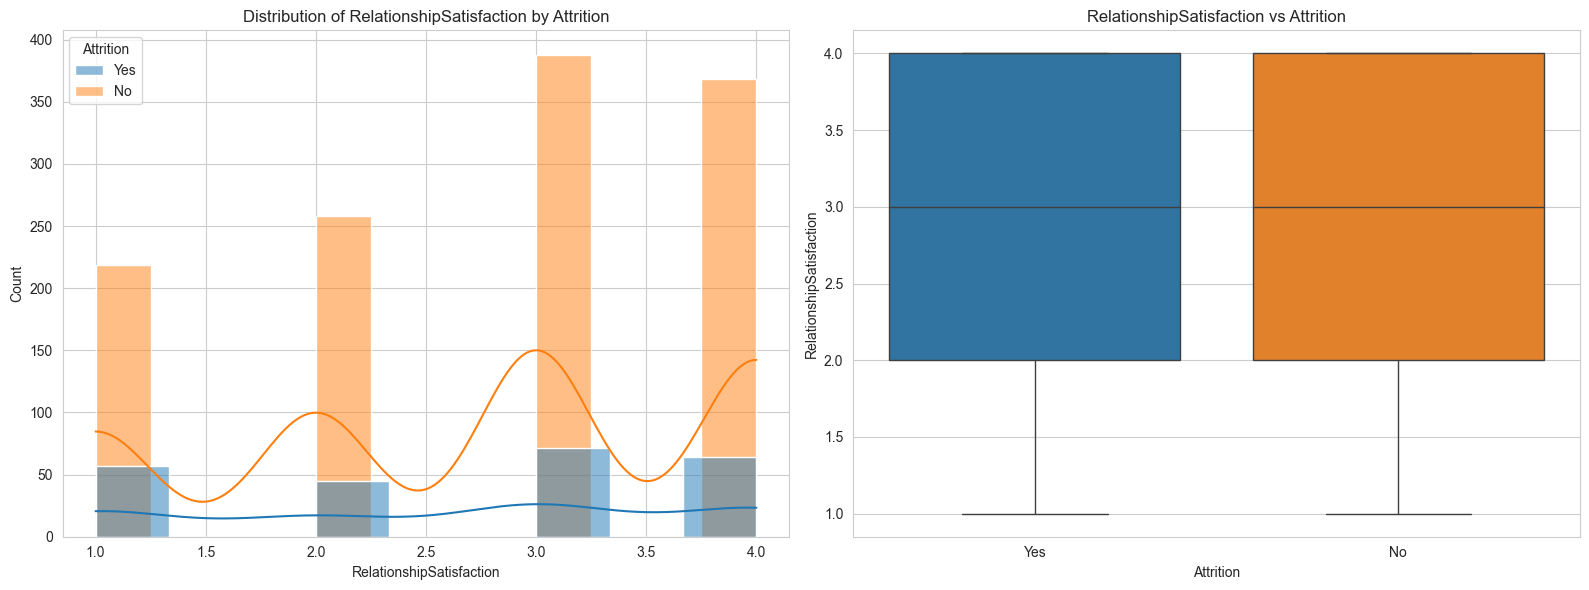

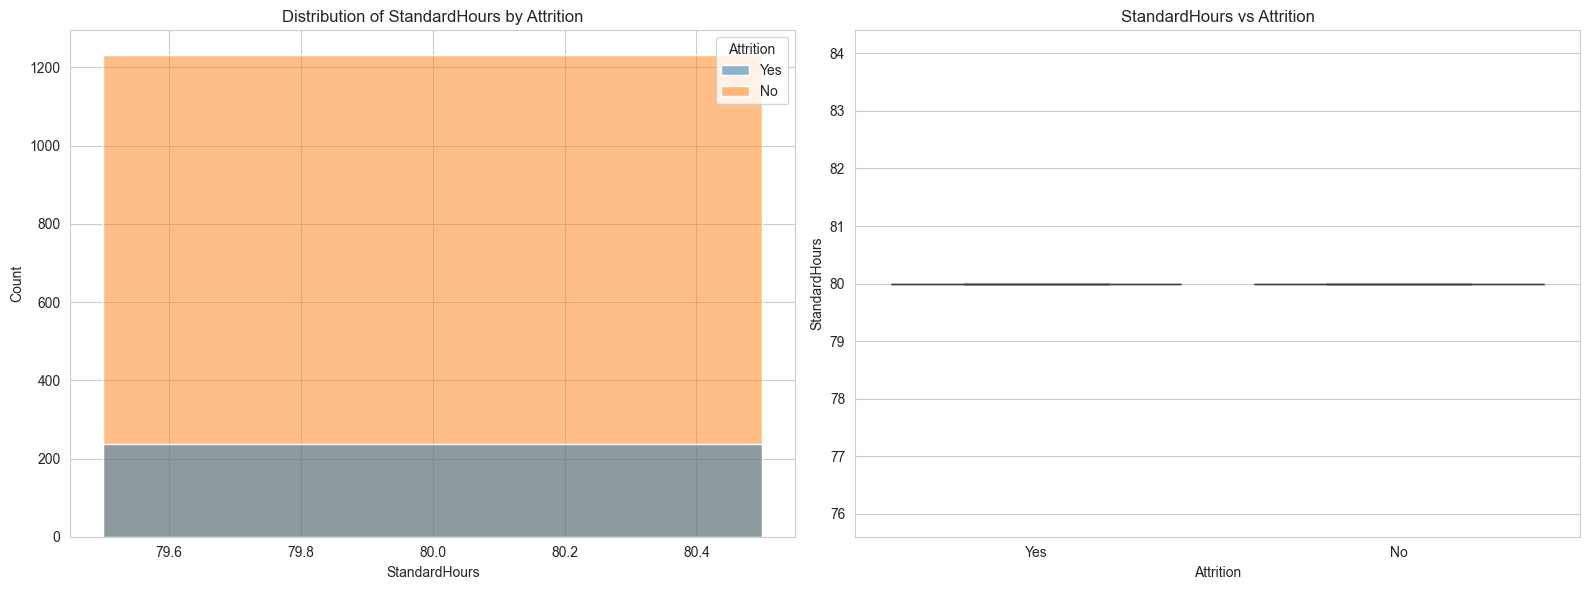

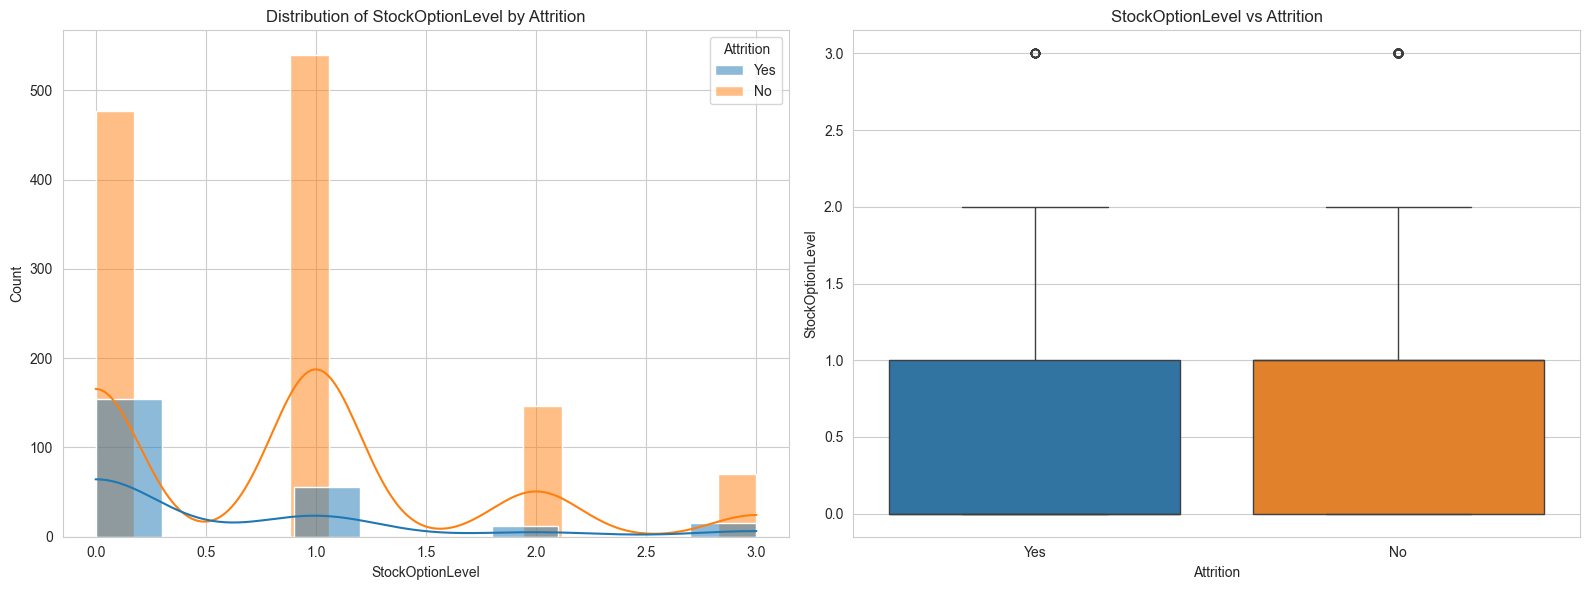

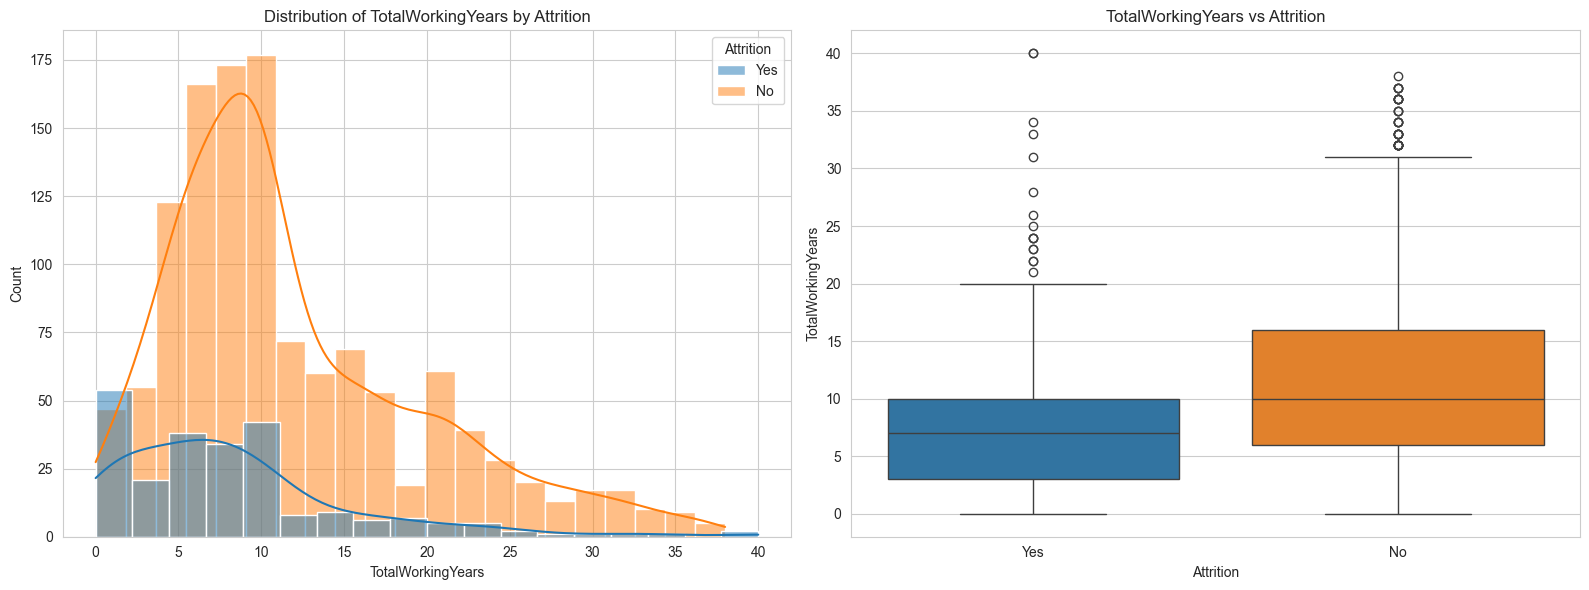

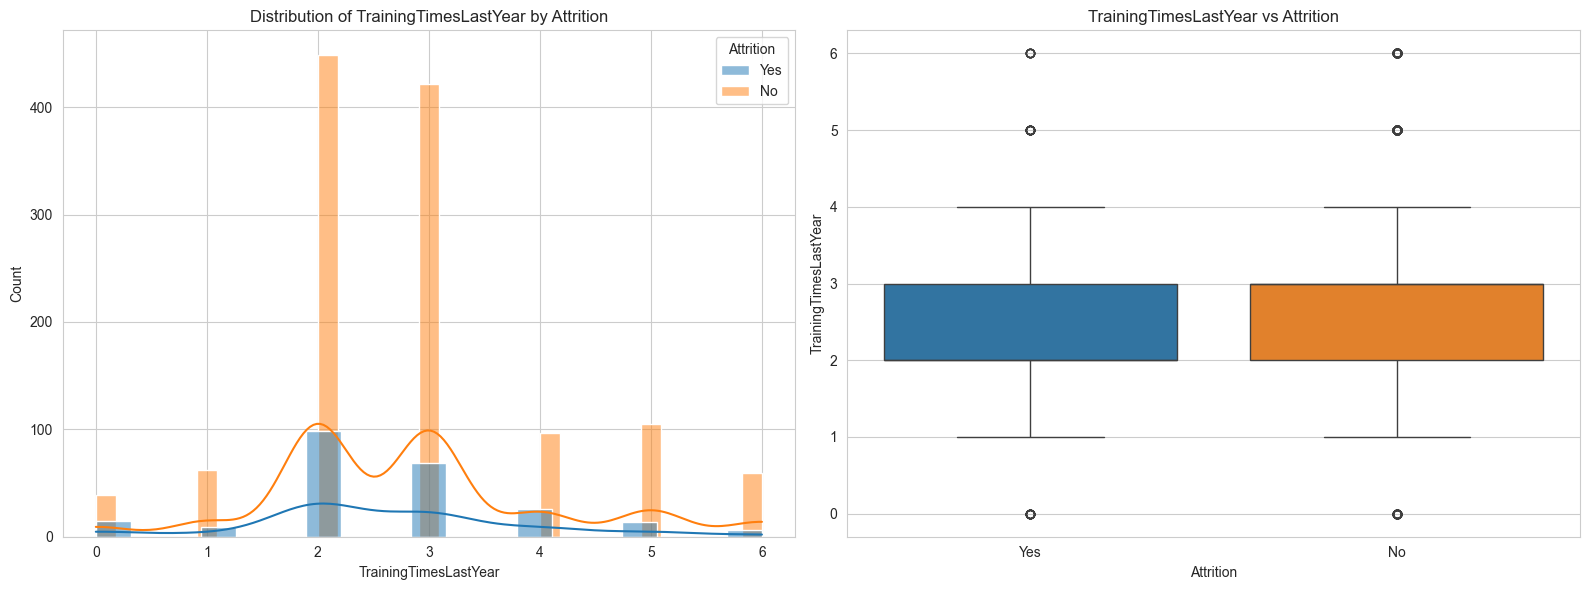

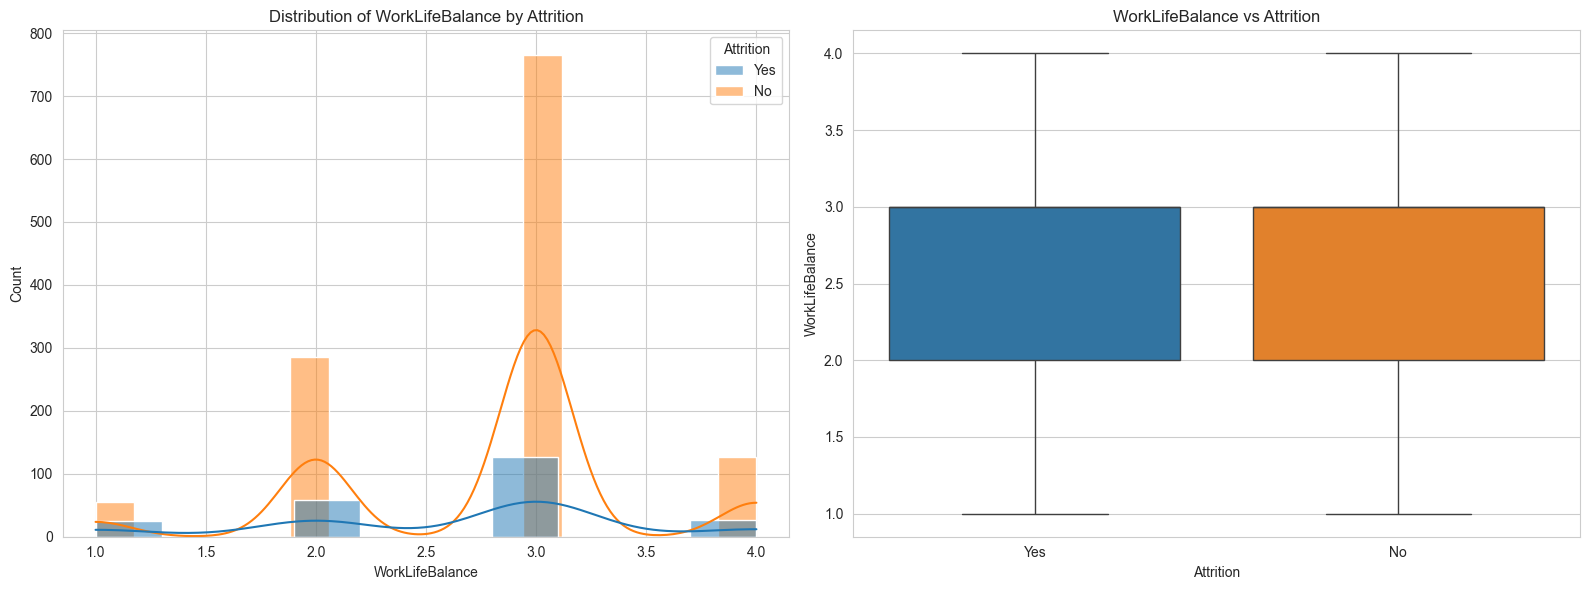

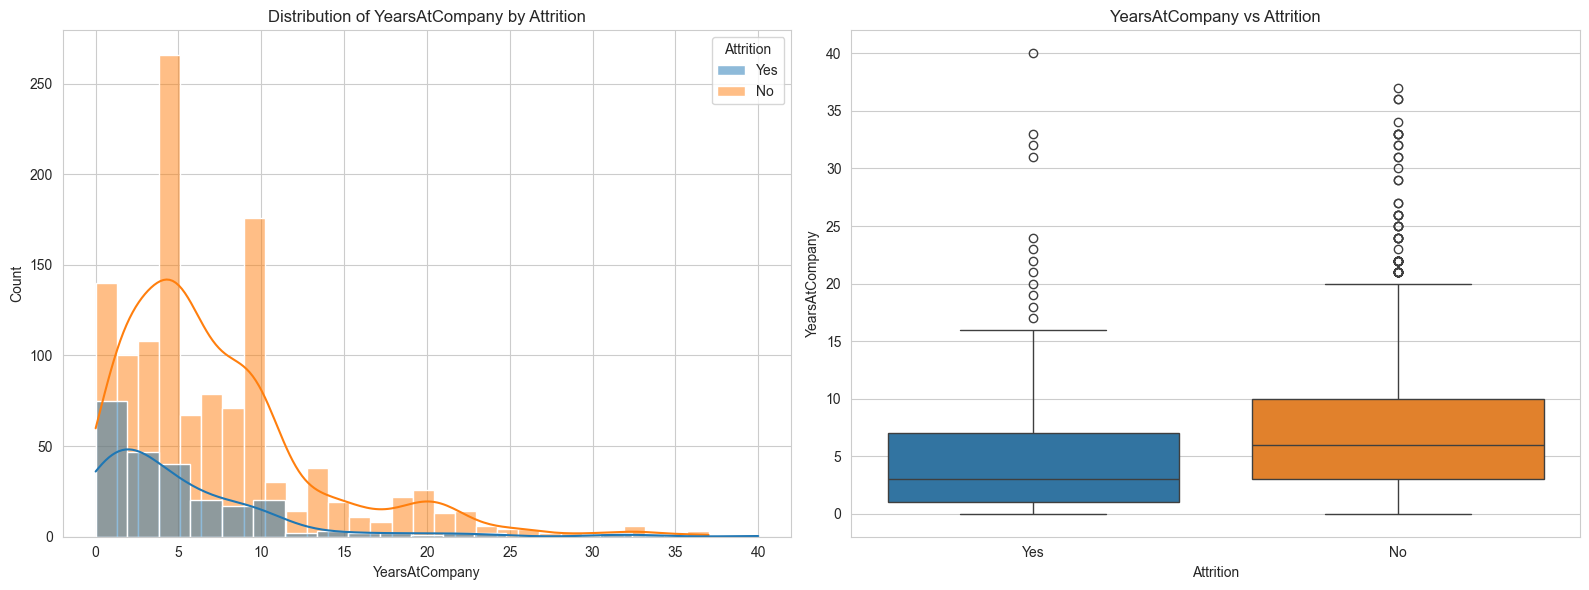

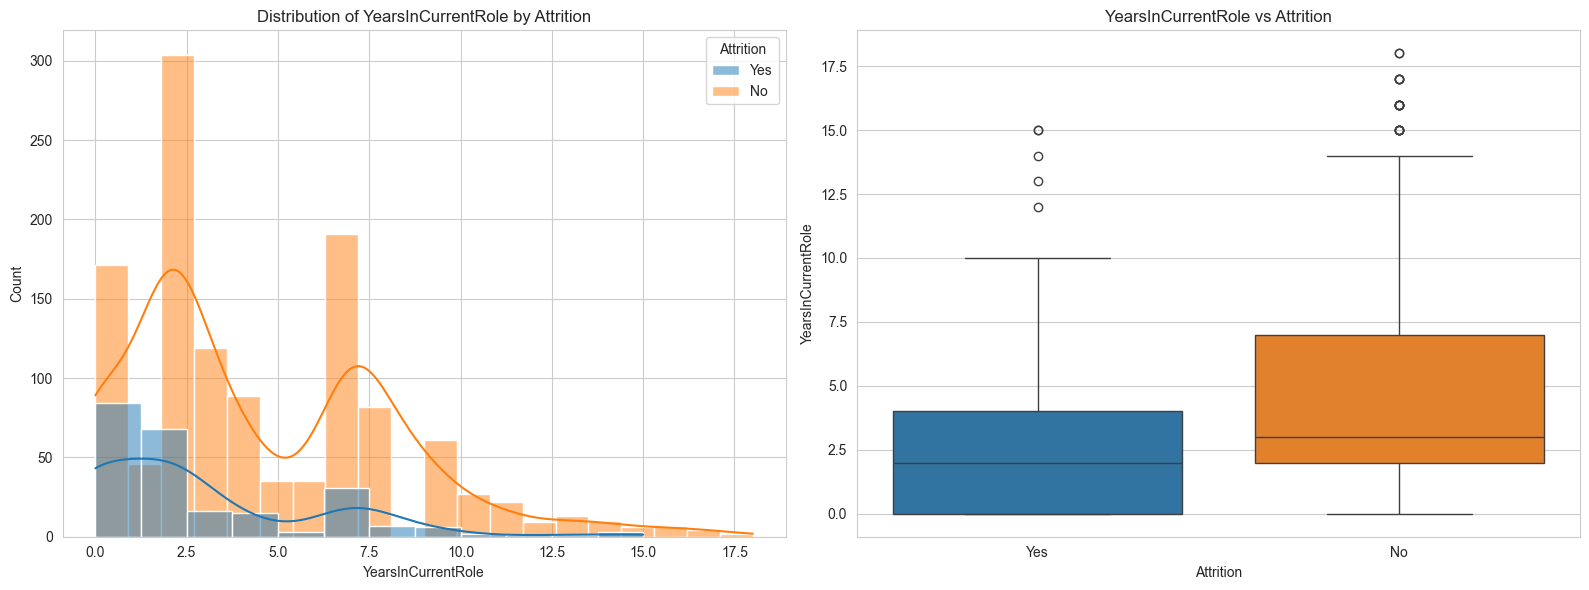

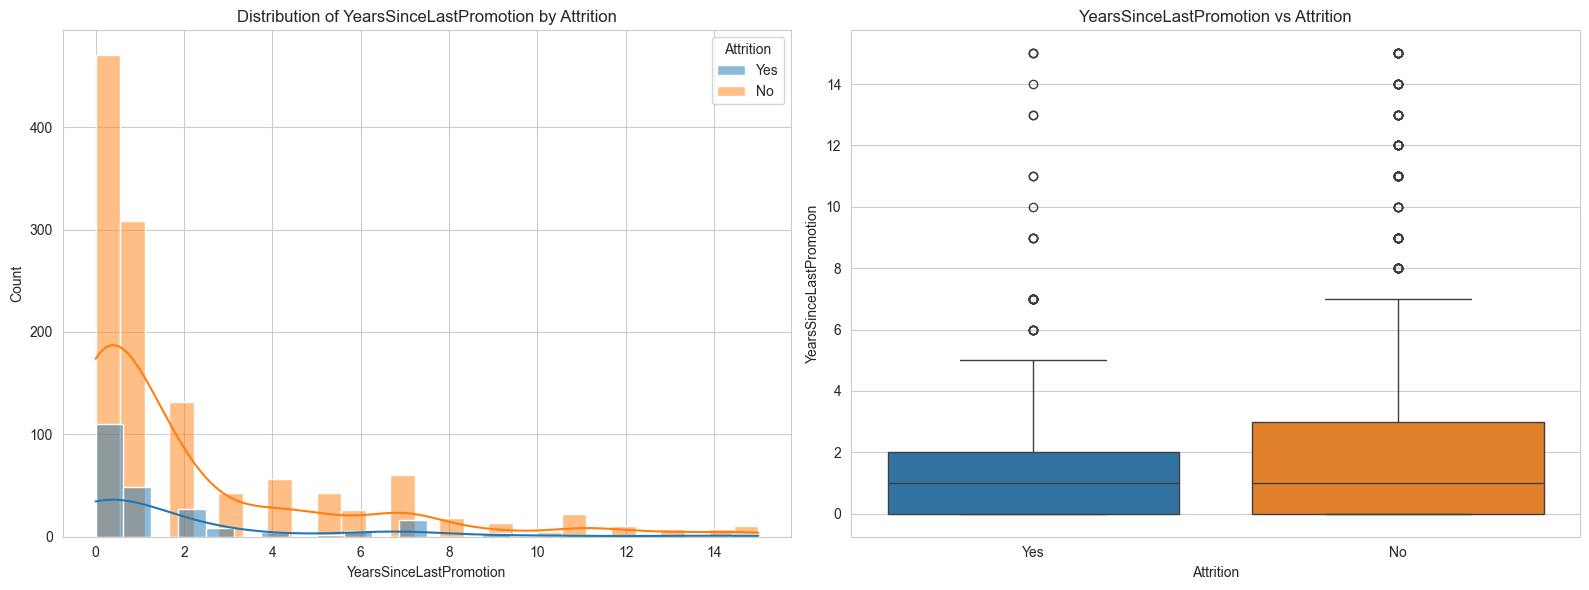

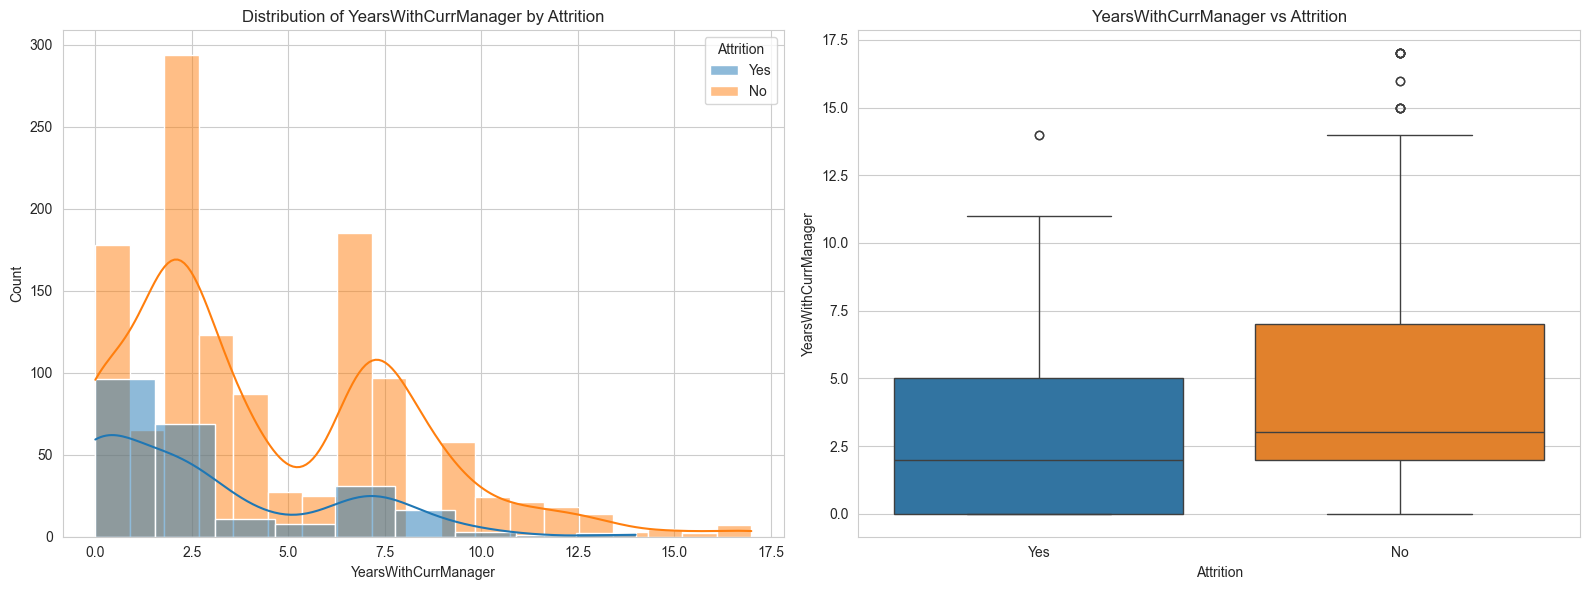

In [57]:

# histogram and boxplot for numerical columns
numerical_columns = [col for col in df.select_dtypes(include='number').columns if col != 'Attrition']

attrition_palette = {'Yes': '#1f77b4', 'No': '#ff7f0e'}  # Blue for "Yes", Orange for "No"

plot_params = {
    'figsize': (16, 6),  # Adjusted for side-by-side plots
    'palette': 'viridis',
    'title_format_hist': 'Distribution of {} by Attrition',
    'title_format_box': '{} vs Attrition'
}

for col in numerical_columns:
    # Create a figure with two subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=plot_params['figsize'])
    
    # Plot histogram on the first subplot
    sns.histplot(df, x=col, hue='Attrition', fill=True, kde=True, common_bins=False, ax=axes[0], palette=attrition_palette)
    axes[0].set_title(plot_params['title_format_hist'].format(col))
    
    # Plot boxplot on the second subplot
    sns.boxplot(x='Attrition', y=col, data=df, hue='Attrition', dodge=False, ax=axes[1],palette=attrition_palette)
    axes[1].set_title(plot_params['title_format_box'].format(col))
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

<Axes: title={'center': 'YearsInCurrentRole Vs MonthlyIncome'}, xlabel='YearsInCurrentRole', ylabel='MonthlyIncome'>

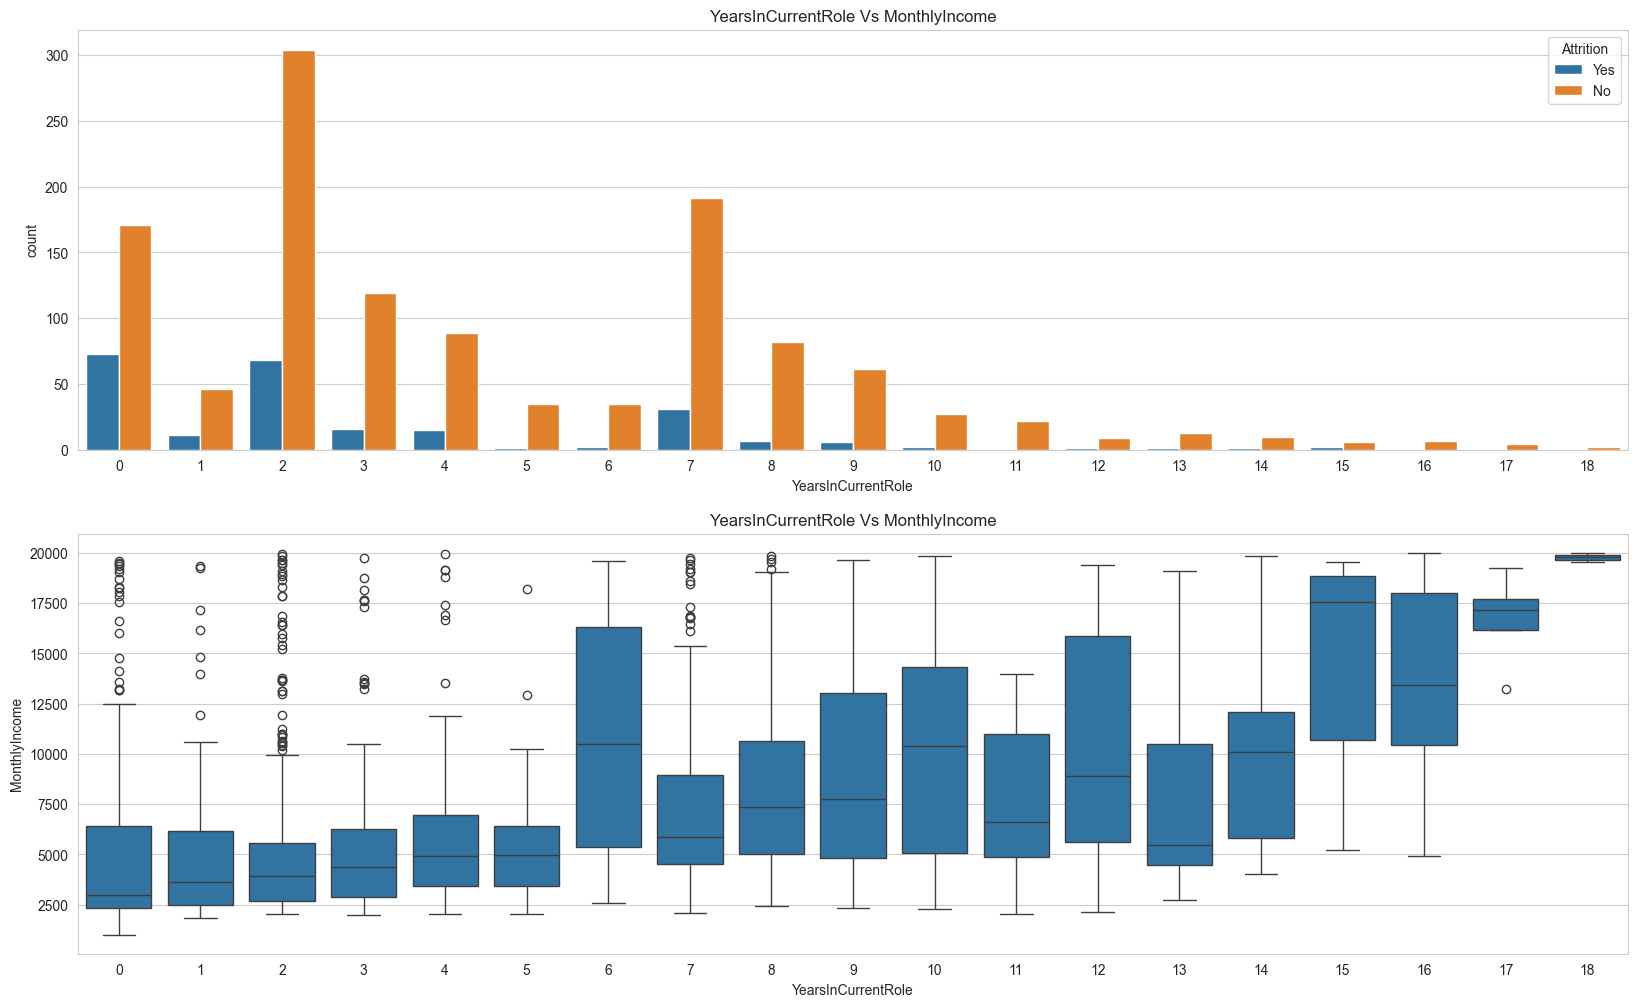

In [58]:
plt.figure(figsize=(20, 12))
plt.subplot(211)
plt.title('YearsInCurrentRole Vs MonthlyIncome')
sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=df, palette=attrition_palette)

plt.subplot(212)
plt.title('YearsInCurrentRole Vs MonthlyIncome')
sns.boxplot(x='YearsInCurrentRole', y='MonthlyIncome', data=df)

# Correlation Mtrix

<Axes: >

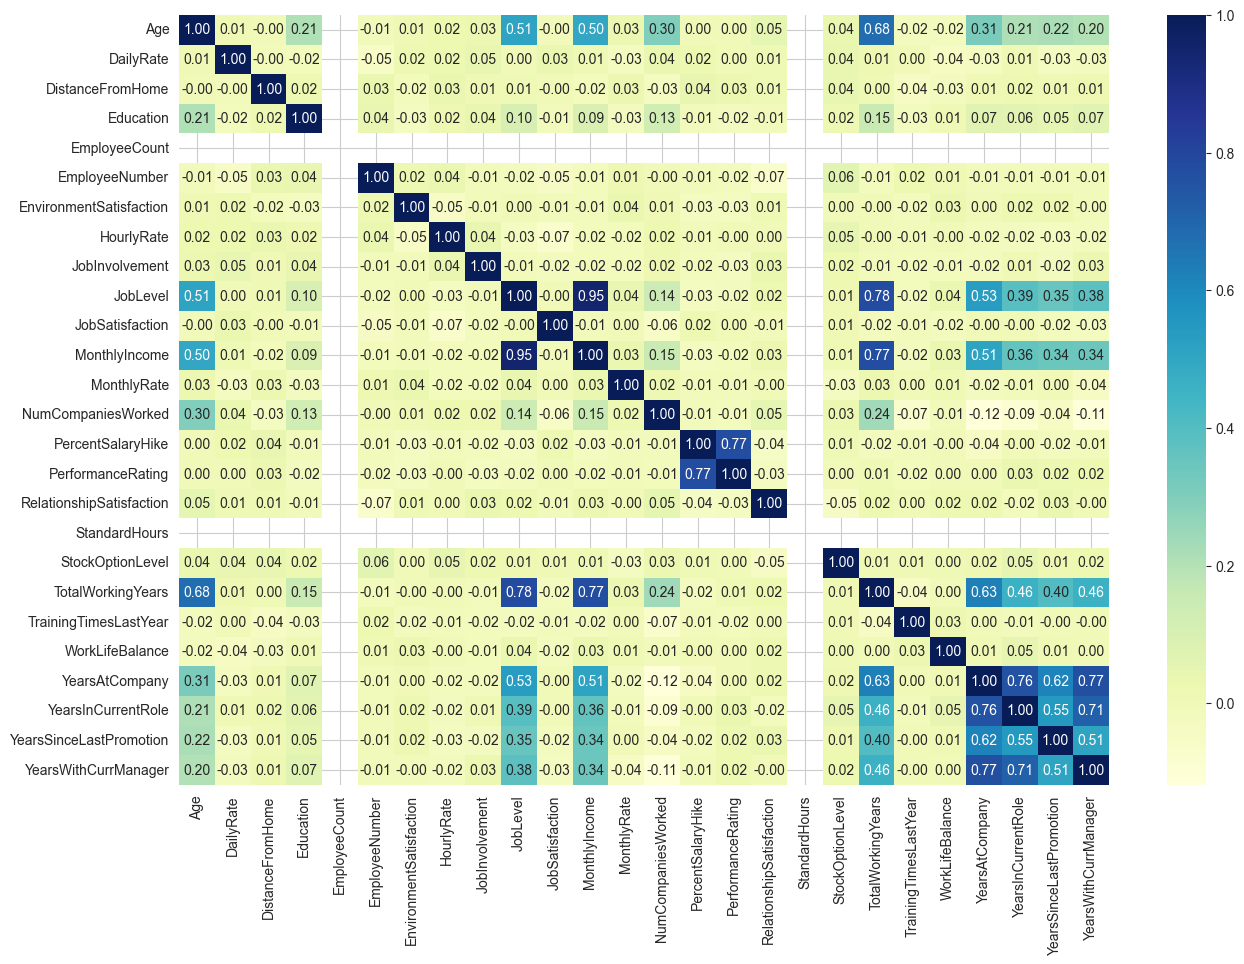

In [59]:

X = df[numerical_columns]
y = df[['Attrition']].values.ravel()
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='YlGnBu')



# preprocessing

In [60]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].astype(int)


In [61]:
#encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat.columns:
    df[col] = le.fit_transform(df[col])


# turget and features

In [62]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [73]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest Classifier')

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

#roc curve


Random Forest Classifier
Accuracy: 0.8775510204081632
Classification Report:               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Confusion Matrix: [[254   1]
 [ 35   4]]


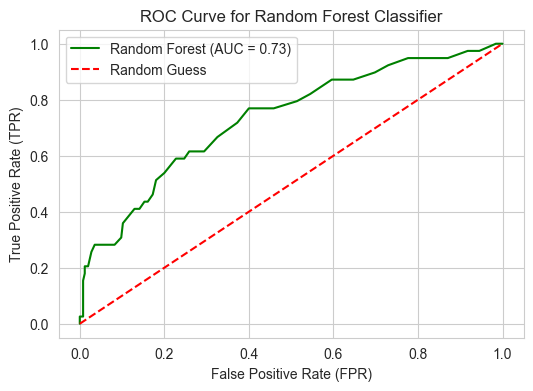

In [72]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = rf.predict_proba(X_test)[:, 1] 

# Calculate the false positive rate, true positive rate, and thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')  # Diagonal line for random guess
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend()
plt.show()

In [67]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))


Logistic Regression
Accuracy: 0.891156462585034
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294

Confusion Matrix: [[249   6]
 [ 26  13]]


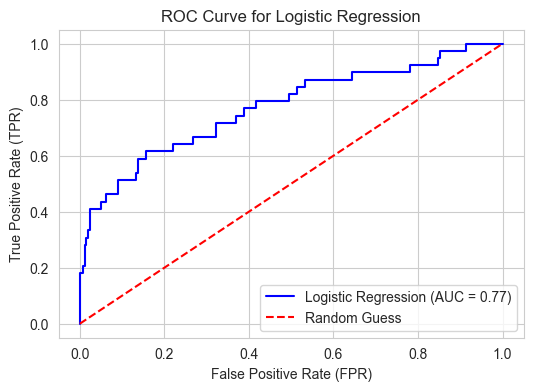

In [68]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)

# Calculate the AUC (Area Under the Curve)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')  # Diagonal line for random guess
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

In [69]:
from lazypredict.Supervised import LazyClassifier

In [70]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)


 97%|█████████▋| 30/31 [00:03<00:00,  8.47it/s]

[LightGBM] [Info] Number of positive: 198, number of negative: 978
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1406
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168367 -> initscore=-1.597243
[LightGBM] [Info] Start training from score -1.597243


100%|██████████| 31/31 [00:04<00:00,  7.65it/s]


In [71]:
sorted_models = models.sort_values('Accuracy', ascending=False)
sorted_models[:20].style.set_properties(**{'text-align': 'left'})


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.891156,0.654902,0.654902,0.874444,0.039922
LinearSVC,0.887755,0.609502,0.609502,0.860865,0.025077
RidgeClassifier,0.887755,0.576923,0.576923,0.850009,0.028564
RidgeClassifierCV,0.884354,0.564103,0.564103,0.843286,0.213593
LGBMClassifier,0.884354,0.618401,0.618401,0.861253,0.213549
CalibratedClassifierCV,0.884354,0.585822,0.585822,0.851427,0.091527
SVC,0.884354,0.564103,0.564103,0.843286,0.109954
LinearDiscriminantAnalysis,0.880952,0.638160,0.638160,0.863922,0.029020
ExtraTreesClassifier,0.877551,0.549321,0.549321,0.834068,0.475261
